In [46]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [55]:
hi = []

for i in range(3, max_k_range, 2):
    hi.append(i)
    
len(hi)

143

In [48]:
train = pd.read_csv("./fake_train.csv")
test = pd.read_csv("./fake_test.csv")

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)

cross_validation_scores = []
x_train = train[['#posts', '#followers', '#follows']]
y_train = train[['fake']]

In [61]:
len(cross_validation_scores)

143

In [60]:
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),
                            cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.8976406533575318,
 0.9009376890502118,
 0.8957350272232306,
 0.9079552329098609,
 0.9027828191167574,
 0.8993042952208106,
 0.8923774954627948,
 0.8906533575317604,
 0.8975499092558984,
 0.897580157289776,
 0.8888384754990926,
 0.8888384754990926,
 0.8940713853599516,
 0.8905928614640048,
 0.8957652752571083,
 0.8922867513611614,
 0.890562613430127,
 0.881881427707199,
 0.8836358136721113,
 0.8836055656382336,
 0.8818511796733212,
 0.8784331518451302,
 0.8749546279491833,
 0.8784331518451302,
 0.874984875983061,
 0.8732607380520265,
 0.8697822141560799,
 0.8697519661222021,
 0.8610102843315186,
 0.8609800362976407,
 0.8609800362976407,
 0.8592558983666063,
 0.8523290986085904,
 0.850574712643678,
 0.8522988505747126,
 0.8487900786448881,
 0.8453418027828192,
 0.8384150030248033,
 0.8332425892316999,
 0.8314882032667876,
 0.8297338173018753,
 0.8297338173018753,
 0.8262552934059286,
 0.8262552934059286,
 0.8245311554748941,
 0.8210526315789475,
 0.8228070175438595,
 0.822807017543859

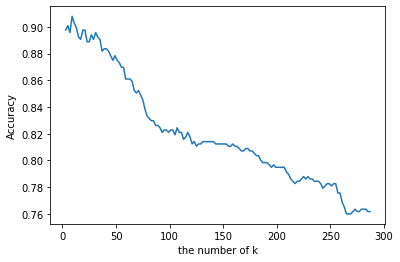

The best number of k : 9


In [43]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()
# find best k
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k : " + str(k) )


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=k)
# select data features
x_train = train[['#posts','#followers' ,'#follows']]
# select target value
y_train = train[['fake']]
# setup knn using train data
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=9)

In [28]:
x_test = test[['#posts', '#followers','#follows']]
# select target value
y_test = test[['fake']]
# test
pred = knn.predict(x_test)
# check ground_truth with knn prediction
comparison = pd.DataFrame(
{'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

,prediction,truth
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [29]:
comparison.tail(60)

,prediction,truth
60,1,1
61,1,1
62,1,1
63,1,1
64,1,1
65,1,1
66,1,1
67,1,1
68,1,1
69,1,1


In [ ]:
약한 학습기
대표적인 weak learner 중 하나인 knn

In [35]:
from sklearn import neighbors, datasets


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

iris = datasets.load_iris()

X = train[['#posts', '#followers', '#follows']]

y = train[['fake']]

# 모델 구축

clf = neighbors.KNeighborsClassifier(5)
clf.fit(X,y)

y_pred=clf.predict(X)

from sklearn.metrics import confusion_matrix

confusion_matrix(y,y_pred)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


array([[264,  24],
       [ 23, 265]], dtype=int64)

In [80]:
np.array(X)[:, 1].min()


0

In [81]:
n_neighbors = 40

h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = np.array(X)[:, 0].min() , np.array(X)[:, 0].max() + 1
    y_min, y_max = np.array(X)[:, 1].min() , np.array(X)[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


MemoryError: Unable to allocate 2.01 PiB for an array with shape (766926950, 369500) and data type float64

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

fake = pd.read_csv('./fake.csv')
fake.head(3)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0


In [139]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('profile pic', axis=1, inplace=True)
    return df_copy
    

In [140]:
def get_train_test_dataset(df=None):
    
    df_copy = get_preprocessed_df(df)
    
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:,-1]
    
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(fake)

In [141]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)


학습 데이터 레이블 값 비율
0    63.446475
1    36.553525
Name: fake, dtype: float64
테스트 데이터 레이블 값 비율
0    63.636364
1    36.363636
Name: fake, dtype: float64


In [142]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, \
    F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [143]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)

lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)


오차 행렬
[[94 11]
 [ 4 56]]
정확도: 0.9091, 정밀도: 0.8358, 재현율: 0.9333,     F1: 0.8819, AUC: 0.9641


In [144]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [145]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[91 14]
 [ 9 51]]
정확도: 0.8606, 정밀도: 0.7846, 재현율: 0.8500,     F1: 0.8160, AUC: 0.9630


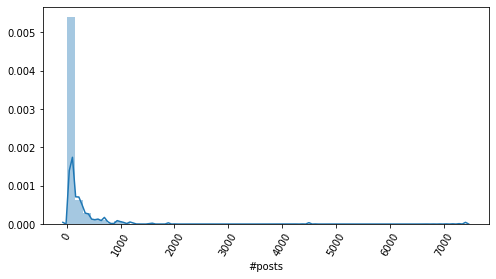

In [146]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(fake['#posts'])

In [147]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    posts_n = scaler.fit_transform(df_copy['#posts'].values.reshape(-1, 1))
    
    df_copy.insert(0, 'posts_Scaled', posts_n)
    
    df_copy.drop(['#posts'], axis=1, inplace=True)
    return df_copy
    

In [148]:
X_train, X_test, y_train, y_test = get_train_test_dataset(fake)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[99  6]
 [ 8 52]]
정확도: 0.9152, 정밀도: 0.8966, 재현율: 0.8667,     F1: 0.8814, AUC: 0.9673
### LightGBM 예측 성능 ###
오차 행렬
[[95 10]
 [ 8 52]]
정확도: 0.8909, 정밀도: 0.8387, 재현율: 0.8667,     F1: 0.8525, AUC: 0.9690


In [151]:
import numpy as np

def get_preprocessed_df(df=None):
    df_copy = df.copy()
  
    posts_n = np.log1p(df_copy['#posts'])
    
    df_copy.insert(0, 'posts_Scaled', posts_n)
    
    df_copy.drop(['#posts'], axis=1, inplace=True)
    return df_copy


In [152]:
X_train, X_test, y_train, y_test = get_train_test_dataset(fake)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[101   4]
 [ 10  50]]
정확도: 0.9152, 정밀도: 0.9259, 재현율: 0.8333,     F1: 0.8772, AUC: 0.9616
### LightGBM 예측 성능 ###
오차 행렬
[[95 10]
 [ 8 52]]
정확도: 0.8909, 정밀도: 0.8387, 재현율: 0.8667,     F1: 0.8525, AUC: 0.9690


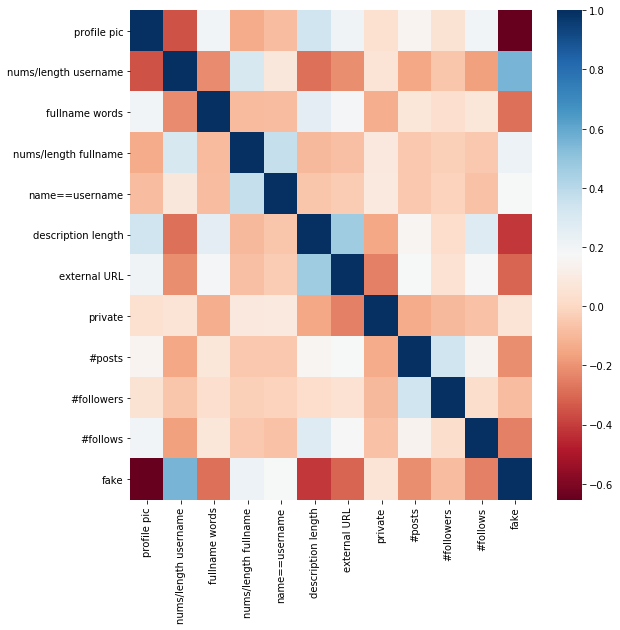

In [153]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = fake.corr()
sns.heatmap(corr, cmap='RdBu')

In [154]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    
    fraud = df[df['fake']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)  
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index

In [155]:
np.percentile(fake['description length'].values, 100)
np.max(fake['description length'])

150

In [156]:
outlier_index = get_outlier(df=fake, column='description length', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([292, 294, 318, 322, 342, 347, 349, 350, 360, 364, 366, 368, 369,
            373, 379, 380, 381, 386, 398, 414, 420, 426, 433, 442, 444, 446,
            454, 462, 470, 472],
           dtype='int64')


In [157]:
def get_preprocessed_df(df=None):
    
    df_copy = df.copy()
    posts_n = np.log1p(df_copy['#posts'])
    df_copy.insert(0, 'posts_Scaled', posts_n)
    df_copy.drop(['#posts'], axis=1, inplace=True)
    
    outlier_index = get_outlier(df=fake, column='description length', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy



X_train, X_test, y_train, y_test = get_train_test_dataset(fake)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[98  7]
 [ 4 47]]
정확도: 0.9295, 정밀도: 0.8704, 재현율: 0.9216,     F1: 0.8952, AUC: 0.9802
### LightGBM 예측 성능 ###
오차 행렬
[[100   5]
 [  8  43]]
정확도: 0.9167, 정밀도: 0.8958, 재현율: 0.8431,     F1: 0.8687, AUC: 0.9793


In [158]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이플 데이터 세트', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이플 데이터 세트', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이플 데이터 세트 (362, 11) (362,)
SMOTE 적용 후 학습용 피처/레이플 데이터 세트 (486, 11) (486,)
SMOTE 적용 후 레이블 값 분포: 
 1    243
0    243
Name: fake, dtype: int64


In [159]:
y_train.value_counts()

0    243
1    119
Name: fake, dtype: int64

In [160]:
lr_clf = LogisticRegression()

get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train = y_train_over, tgt_test=y_test)

오차 행렬
[[97  8]
 [ 1 50]]
정확도: 0.9423, 정밀도: 0.8621, 재현율: 0.9804,     F1: 0.9174, AUC: 0.9826


In [161]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

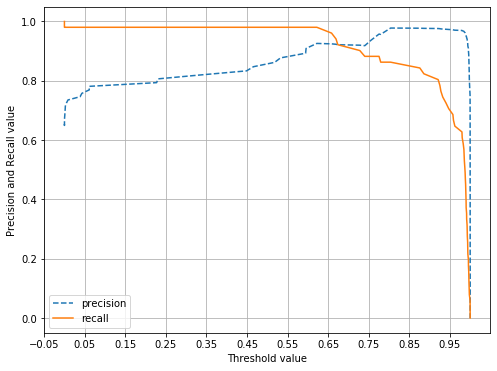

In [162]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [163]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[99  6]
 [ 8 43]]
정확도: 0.9103, 정밀도: 0.8776, 재현율: 0.8431,     F1: 0.8600, AUC: 0.9817
